<a href="https://colab.research.google.com/github/alenready/ML_AI_ICT-Assignments/blob/main/Assignment02_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Step 2: Load the dataset
file_path = '/content/diabetes (1).csv'  # Update this path if needed
data = pd.read_csv(file_path)


In [4]:
# make a data copy

data_copy = data.copy()


In [5]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
# Step 3: Inspect the dataset
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
data.info()
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Head:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   

In [7]:
# Step 4: Replace zeros with NaN (for specific columns only)
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zeros] = data[columns_with_zeros].replace(0, np.nan)


In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [12]:
# Step 5: Handle missing values (imputation using mean)
for column in columns_with_zeros:
    data[column].fillna(data[column].mean(), inplace=True)
    data[column] = data[column].astype(int)
    print(f"Missing values in {column}: {data[column].isnull().sum()}")
    print(f"Unique values in {column}: {data[column].unique()}")
    print(f"Mean of {column}: {data[column].mean()}")
    print(f"Median of {column}: {data[column].median()}")
    print(f"Standard Deviation of {column}: {data[column].std()}")
    print(f"Minimum value of {column}: {data[column].min()}")
    print(f"Maximum value of {column}: {data[column].max()}")
    print("\n")
    print(data[column].describe())
    print("\n")
    data.tail()


Missing values in Glucose: 0
Unique values in Glucose: [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79 121  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198  67 174 199  56 169 149  65 190]
Mean of Glucose: 121.68229166666667
Median of Glucose: 117.0
Standard Deviation of Glucose: 30.435999047623625
Minimum value of Glucose: 44
Maximum value of Glucose: 199


count    768.000000
mean     121.682292
std       30.435999
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64


Missing values in BloodPressure:

<ipython-input-12-a78a49240ba1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
<ipython-input-12-a78a49240ba1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [13]:
# Step 6: Check for missing values again
print("\nMissing Values After Imputation:")
print(data.isnull().sum())


Missing Values After Imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


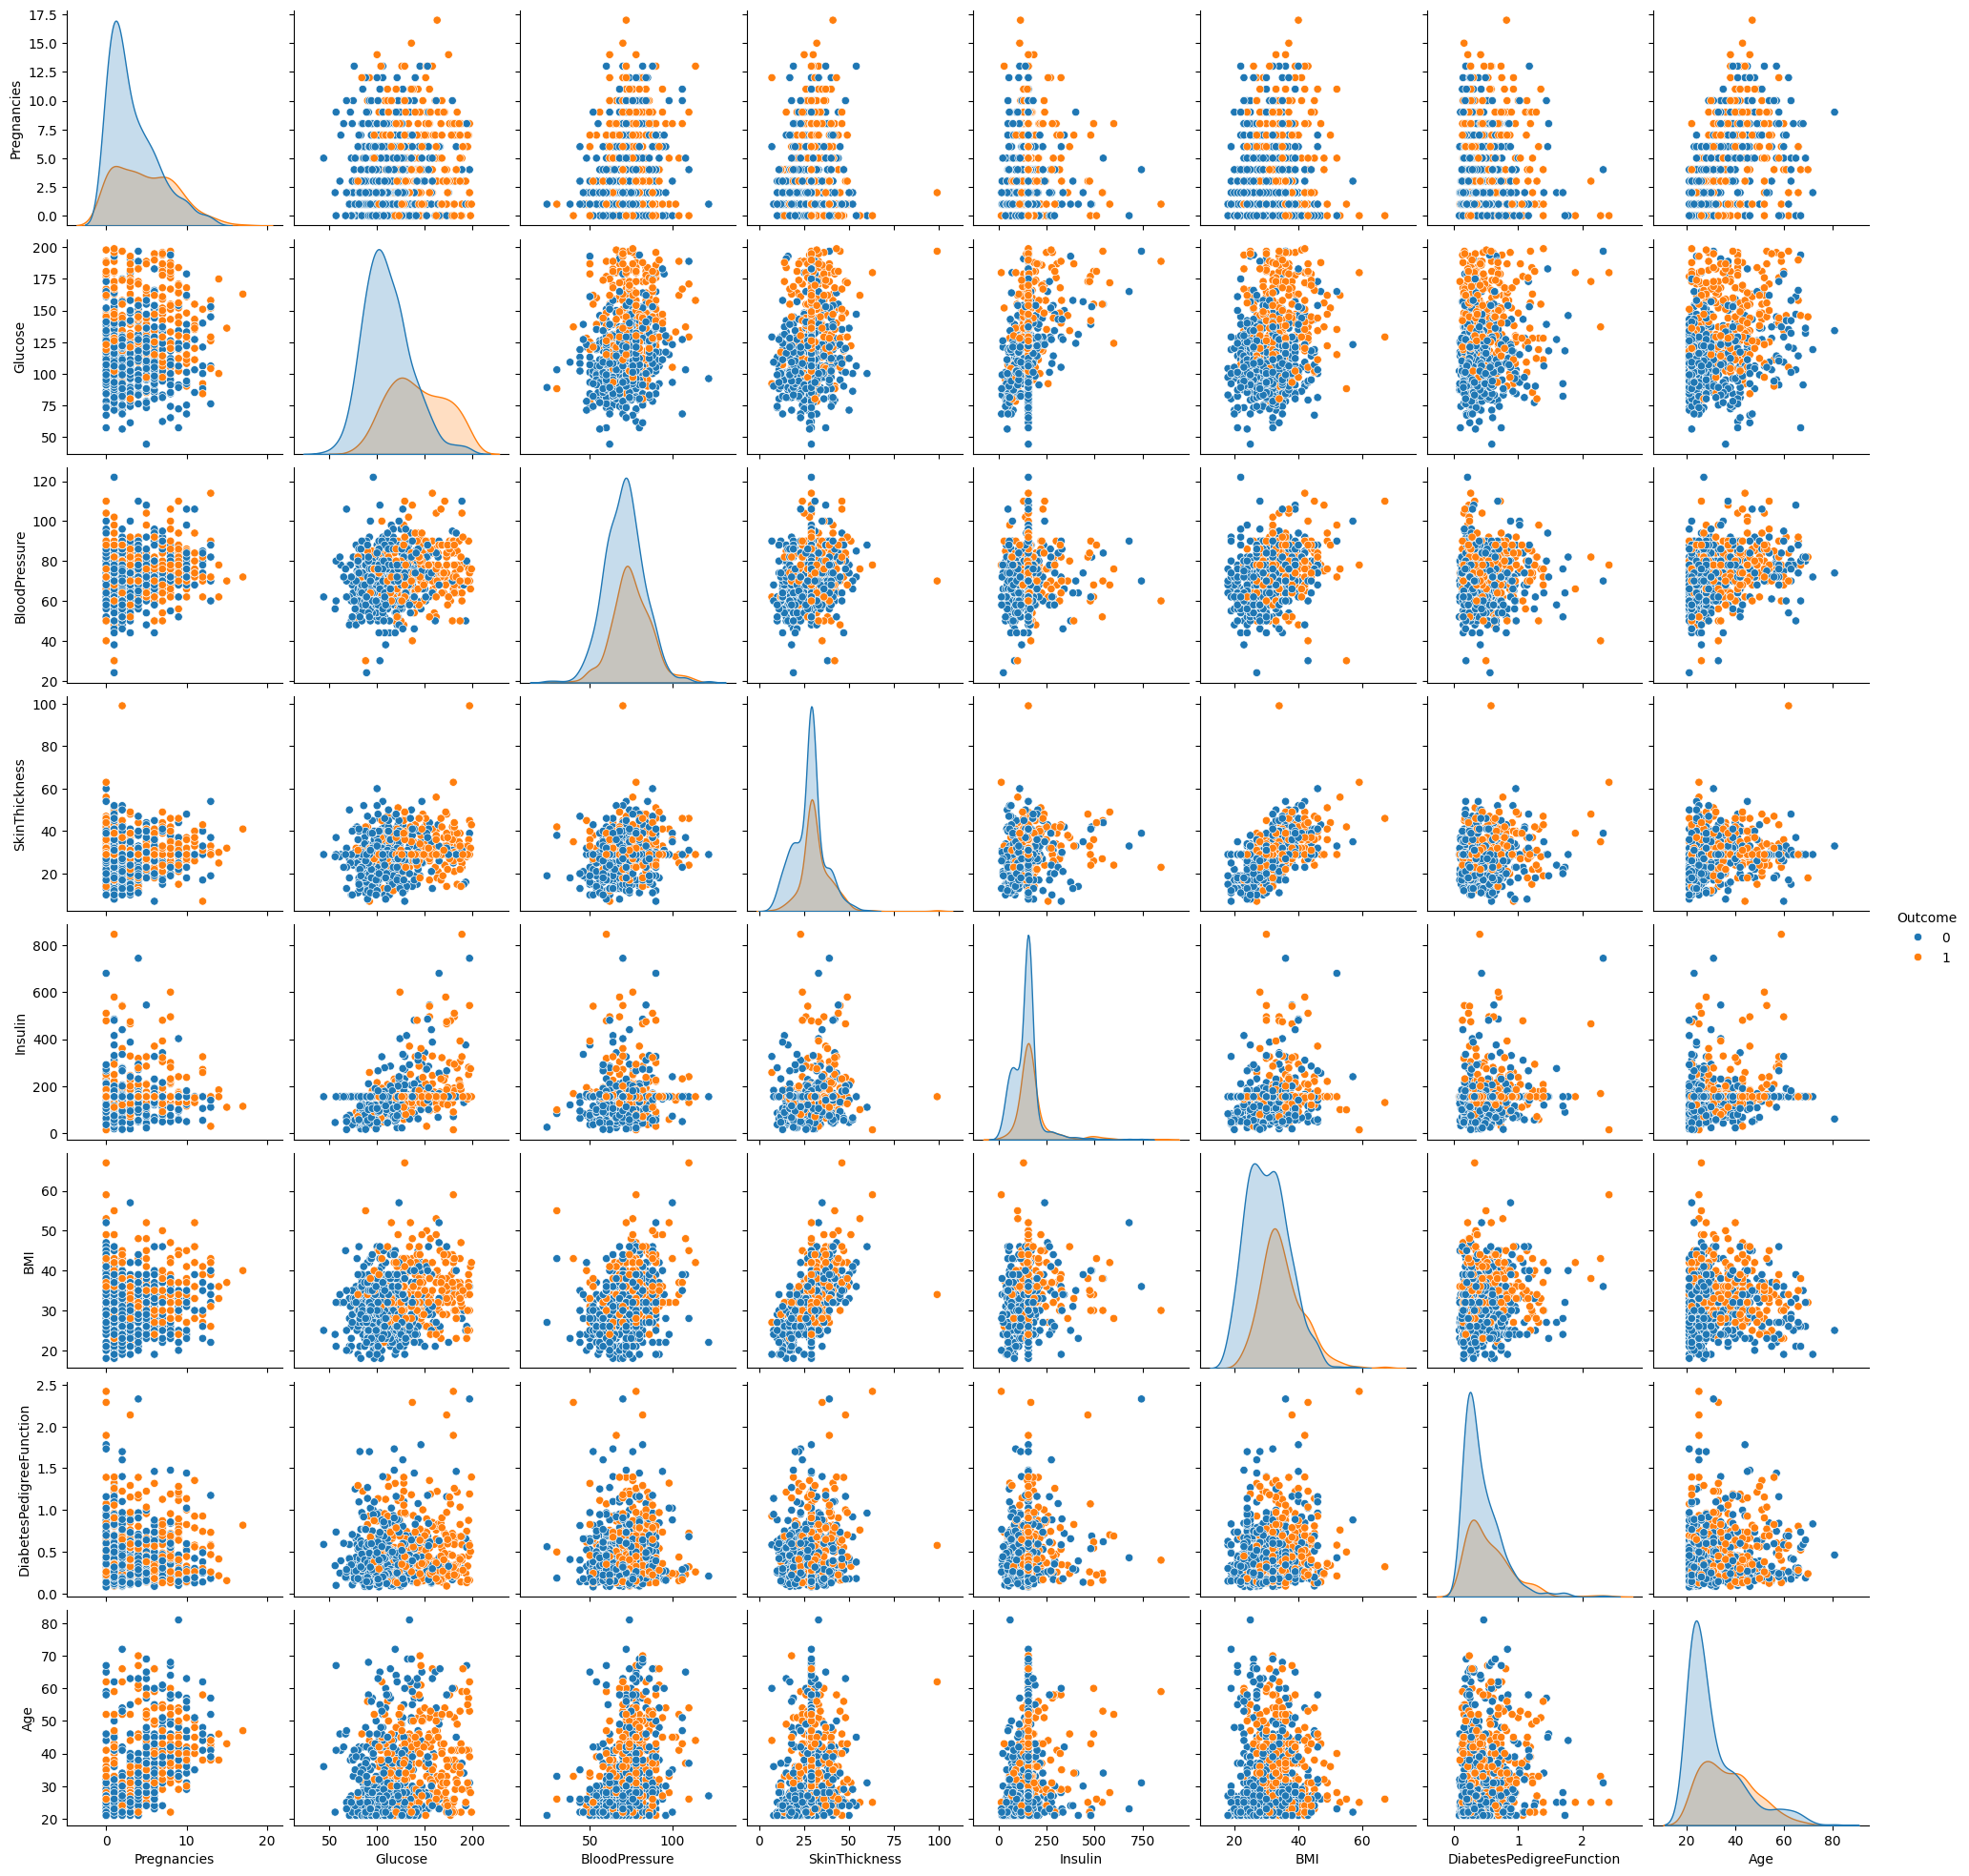

In [14]:
# Step 7: Visualize the dataset
sns.pairplot(data, hue='Outcome')
plt.show()

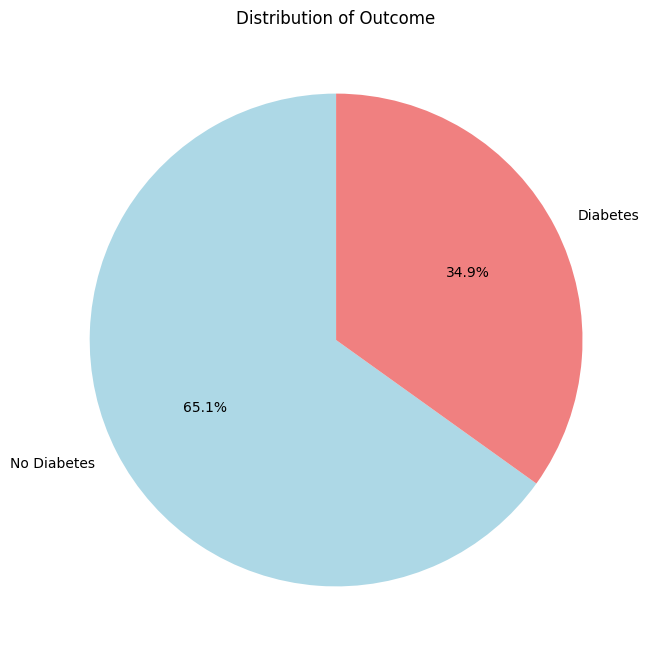

In [20]:
# Pie chart for the distribution of Outcome
plt.figure(figsize=(8, 8))
data['Outcome'].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, colors=["lightblue", "lightcoral"], labels=["No Diabetes", "Diabetes"])
plt.title("Distribution of Outcome")
plt.ylabel("")
plt.show()


<Figure size 1200x800 with 0 Axes>

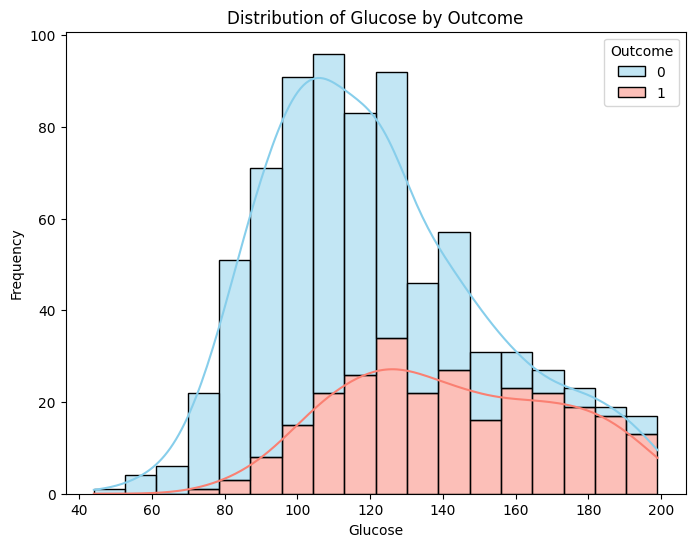

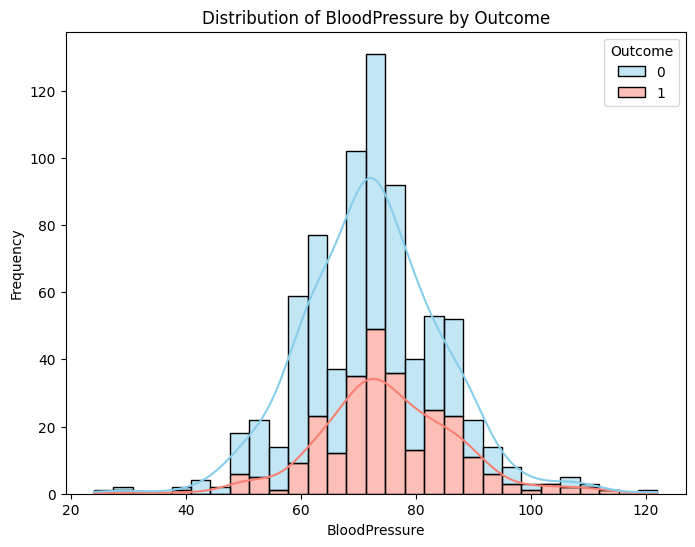

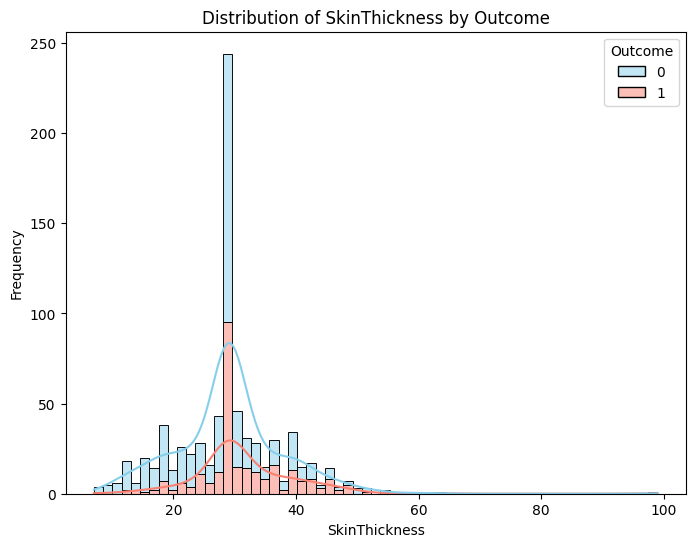

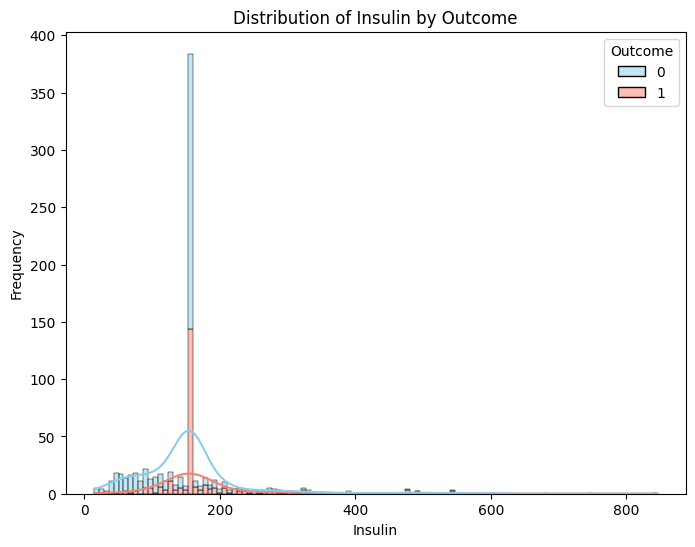

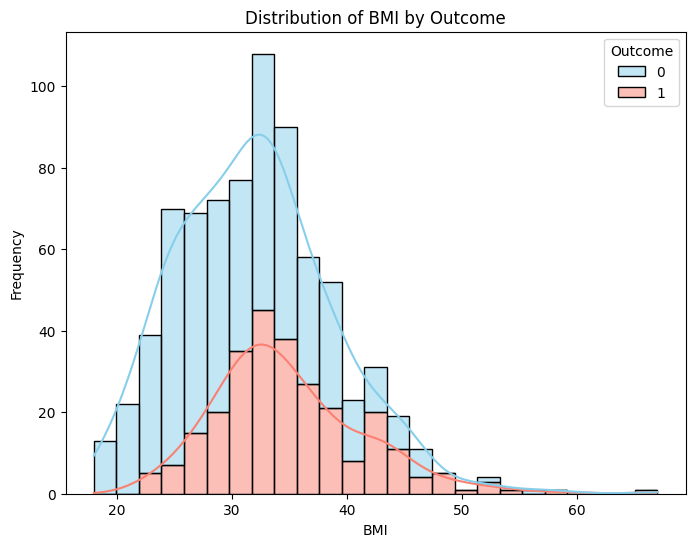

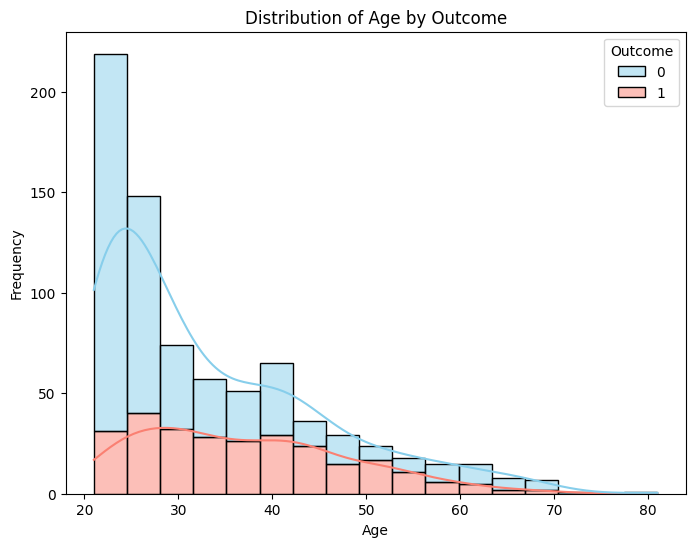

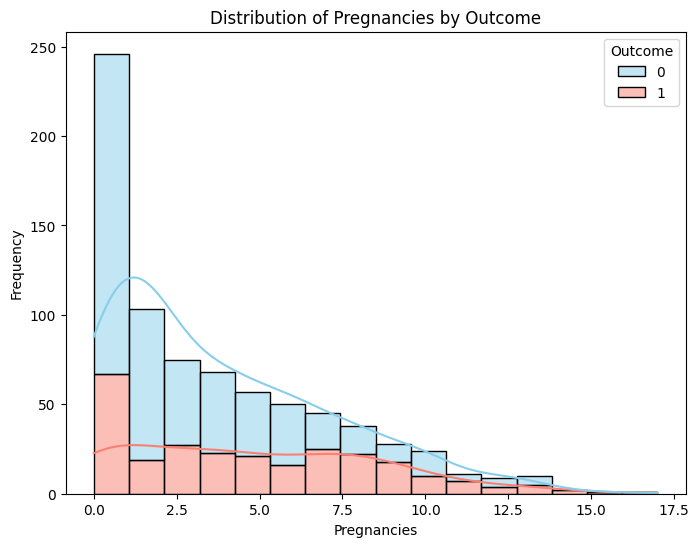

In [21]:
# grouped by diabetes ,colourful visualisation histogram

import matplotlib.pyplot as plt
import seaborn as sns


# Grouped Histograms with colors
plt.figure(figsize=(12, 8))

for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'Pregnancies']:
    plt.figure(figsize=(8,6)) # create a new figure for each histogram
    sns.histplot(data=data, x=column, hue='Outcome', kde=True, palette=['skyblue', 'salmon'], multiple='stack')
    plt.title(f'Distribution of {column} by Outcome')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

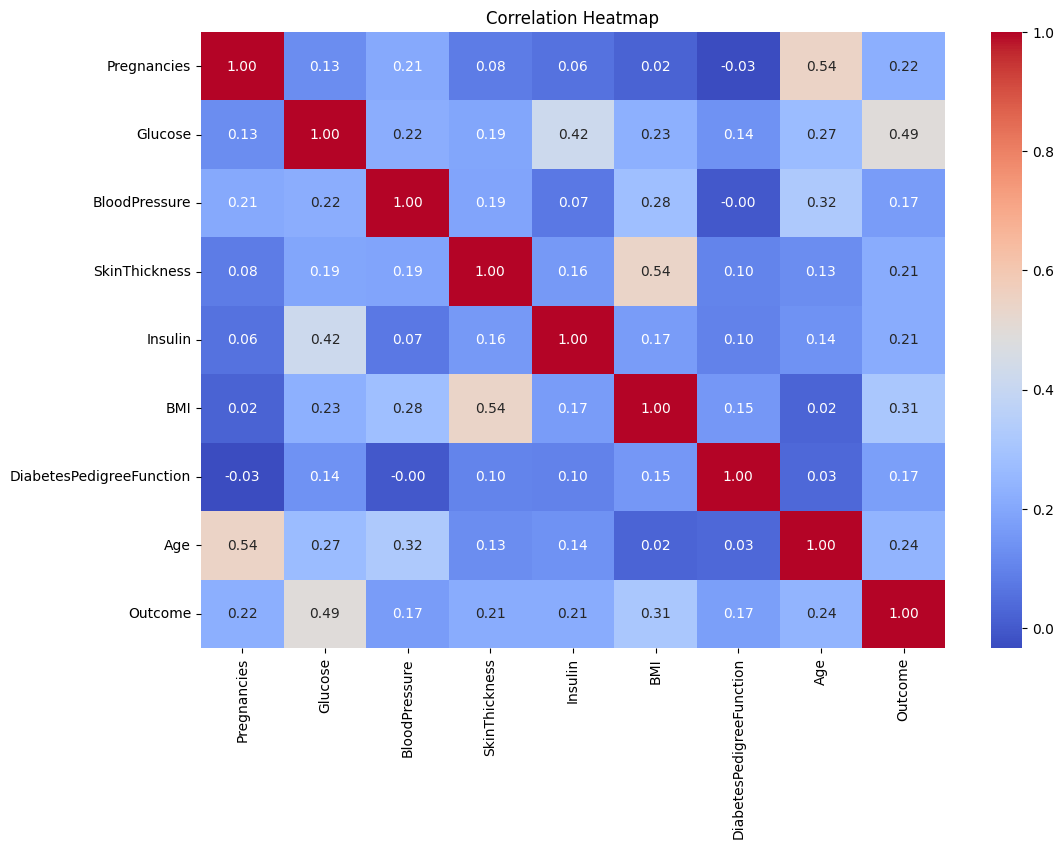

In [22]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()




## **Insights from the Heatmap for Diabetes Prediction**

### The correlation heatmap visualizes the relationships between different features in the diabetes dataset.  Here's how to interpret it for prediction:

### Strong Positive Correlations:
### Features with high positive correlations (close to 1) tend to move in the same direction.  If one increases, the other is likely to increase as well.  For prediction, this means these features provide similar information.  You might consider removing one of a highly correlated pair to avoid redundancy and potential multicollinearity issues in some models.  Look for pairs like:

### * **BMI and SkinThickness:**  A strong positive correlation suggests that individuals with higher BMI tend to have greater skin thickness.
### * **Age and Pregnancies:**  A positive correlation, though less strong than others, indicates that older individuals tend to have had more pregnancies.


### Weak or No Correlation:
### Features with correlations close to 0 show little to no linear relationship.  This doesn't mean they're unimportant; they might still have a non-linear relationship with the outcome or with other features.

## Correlations with Outcome:
### The most crucial correlations are those with the 'Outcome' variable (diabetes or not).  Look for the features with the highest absolute correlation values with 'Outcome':

### * **Glucose:** Likely a strong predictor. High glucose levels are a major indicator of diabetes.
### * **BMI:**  Also a significant predictor.
### * **Age:**  Positive correlation suggests a higher likelihood of diabetes with increasing age.

### Using the Heatmap for Model Improvement
### 1. Feature Selection:  The heatmap helps identify redundant features.  If two or more features are highly correlated, you might choose to remove one to simplify the model and potentially improve performance.
### 2. Feature Engineering:  Identify features with moderate correlations to the 'Outcome'. You could explore creating new features that combine these to potentially improve model accuracy.
## 3. Model Interpretation:  The heatmap provides insights into which features are most important for prediction.  This helps explain how the model arrives at its predictions.  


### Important Considerations:
### * Correlation does not equal causation. A strong correlation doesn't prove that one feature directly causes the other.
### * The heatmap shows only linear correlations.  There might be non-linear relationships between features that are not captured by the heatmap.


In [23]:
# Step 8: Prepare the data for modeling
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [24]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# Step 9: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [26]:
# Step 10: Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [27]:
# Step 11: Evaluate the model
predictions = rf_classifier.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Confusion Matrix:
[[80 19]
 [18 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [28]:

# Step 12: Feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_classifier.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)


In [29]:
print("\nFeature Importances:")
print(feature_importances)



Feature Importances:
                    Feature  Importance
1                   Glucose    0.260480
5                       BMI    0.143945
7                       Age    0.142823
6  DiabetesPedigreeFunction    0.123506
4                   Insulin    0.091062
2             BloodPressure    0.086985
3             SkinThickness    0.076826
0               Pregnancies    0.074373


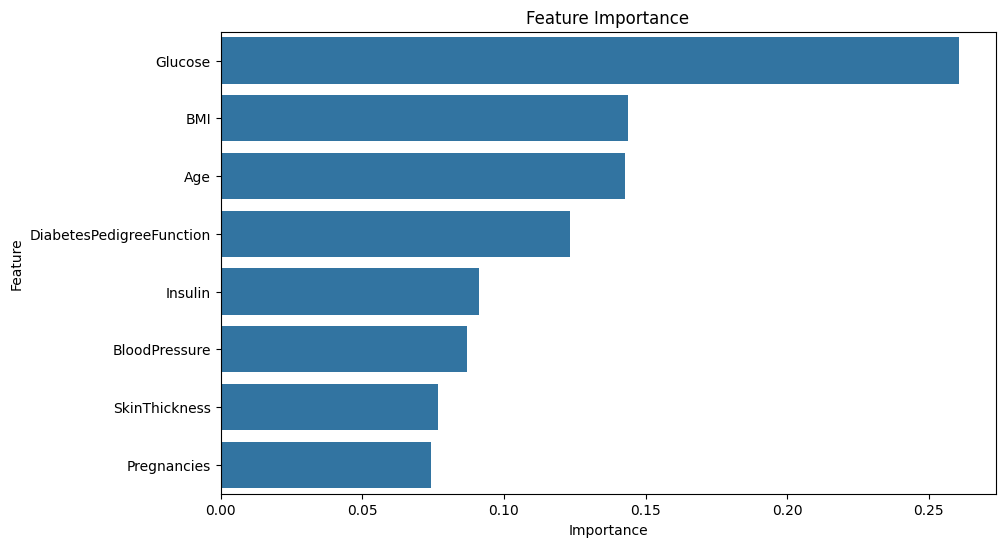

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()


In [31]:
# Step 13: Diagnose a new patient
def diagnose_patient(features):
    """
    Diagnose a patient based on input features.

    Parameters:
        features (list or array): A list or array containing the feature values in the following order:
        [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]

    Returns:
        int: 1 if the patient is predicted to have diabetes, 0 otherwise.
    """
    if len(features) != X.shape[1]:
        raise ValueError(f"Expected {X.shape[1]} features, but got {len(features)}")

    # Scale the input features
    features_scaled = scaler.transform([features])

    # Predict the outcome
    prediction = rf_classifier.predict(features_scaled)
    return int(prediction[0])

# Example usage of the diagnose_patient function
example_patient = [2, 120, 70, 25, 100, 28.5, 0.5, 30]  # Replace with real patient data
result = diagnose_patient(example_patient)
print(f"\nDiagnosis Result: {'Diabetes' if result == 1 else 'No Diabetes'}")



Diagnosis Result: No Diabetes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:

# Example usage of the diagnose_patient function with user input
def get_user_input():
    """Gets patient data from the user."""
    features = []
    try:
        features.append(int(input("Enter Pregnancies: ")))
        features.append(int(input("Enter Glucose: ")))
        features.append(int(input("Enter BloodPressure: ")))
        features.append(int(input("Enter SkinThickness: ")))
        features.append(int(input("Enter Insulin: ")))
        features.append(float(input("Enter BMI: ")))
        features.append(float(input("Enter DiabetesPedigreeFunction: ")))
        features.append(int(input("Enter Age: ")))
        return features
    except ValueError:
        print("Invalid input. Please enter numeric values.")
        return None

# Get patient data from the user
patient_features = get_user_input()

if patient_features:
    result = diagnose_patient(patient_features)
    print(f"\nDiagnosis Result: {'Diabetes' if result == 1 else 'No Diabetes'}")

Enter Pregnancies: 6
Enter Glucose: 148
Enter BloodPressure: 72
Enter SkinThickness: 35
Enter Insulin: 0
Enter BMI: 33.6
Enter DiabetesPedigreeFunction: 0.627
Enter Age: 50

Diagnosis Result: Diabetes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
